In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import ssl
from pandas import Series


ssl._create_default_https_context = ssl._create_unverified_context
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

#coding:utf-8
import json
import urllib.request
import matplotlib.pyplot as plt
import numpy as np

import time, json, requests
# 抓取腾讯疫情实时json数据
url = 'https://raw.githubusercontent.com/devanshmalik/Inferential-Stats-in-Python/master/confidence%20intervals%20%26%20hypothesis%20testing/coffee_dataset.csv'
data = pd.read_csv(url)
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2974 non-null   int64  
 1   age            2974 non-null   object 
 2   drinks_coffee  2974 non-null   bool   
 3   height         2974 non-null   float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 72.7+ KB


In [10]:
# proportion of coffee drinkers in sample
data['drinks_coffee'].value_counts(normalize=True)

True     0.589778
False    0.410222
Name: drinks_coffee, dtype: float64

In [26]:
data[data['drinks_coffee']==True]['height'].count()

1754

In [24]:
data[data['drinks_coffee']==True]['height'].mean()

68.40021025548381

In [25]:
data[data['drinks_coffee']==False]['height'].mean()

66.443407762147

In [21]:
sample=data.sample(200)

In [22]:
sample['drinks_coffee'].value_counts(normalize=True)

True     0.595
False    0.405
Name: drinks_coffee, dtype: float64

In [37]:
sample[sample['drinks_coffee']==False]['height'].mean()-sample[sample['drinks_coffee']==True]['height'].mean()

-2.419430352831128

In [28]:
nocoff_means, coff_means, diff_means = [],[],[]

# sampling distribution -- the distribution of sample statistics


# bootstrap sample data
for _ in range(10000):
    bootsamp = sample.sample(200, replace = True)
    nocoff_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
       
    # append means    
    nocoff_means.append(nocoff_mean)
    coff_means.append(coff_mean)
    diff_means.append(coff_mean - nocoff_mean)

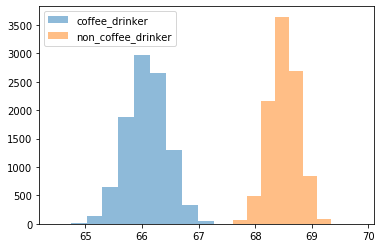

In [33]:
non=plt.hist(nocoff_means, alpha = 0.5);
drinker=plt.hist(coff_means, alpha = 0.5);
plt.legend(['coffee_drinker','non_coffee_drinker'])

(array([9.000e+00, 1.280e+02, 7.160e+02, 2.073e+03, 3.167e+03, 2.513e+03,
        1.106e+03, 2.580e+02, 2.900e+01, 1.000e+00]),
 array([0.73786423, 1.09728555, 1.45670687, 1.8161282 , 2.17554952,
        2.53497084, 2.89439217, 3.25381349, 3.61323481, 3.97265613,
        4.33207746]),
 <a list of 10 Patch objects>)

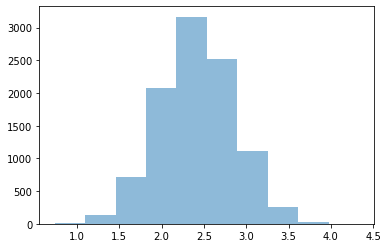

In [34]:
plt.hist(diff_means, alpha = 0.5)

In [35]:
null_vals = np.random.normal(0, np.std(diff_means), 10000)

(array([  13.,   83.,  504., 1524., 2753., 2800., 1626.,  578.,  109.,
          10.]),
 array([-1.69604524, -1.35935413, -1.02266301, -0.6859719 , -0.34928079,
        -0.01258968,  0.32410143,  0.66079254,  0.99748365,  1.33417476,
         1.67086588]),
 <a list of 10 Patch objects>)

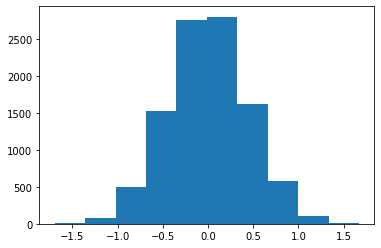

In [36]:
plt.hist(null_vals)

In [38]:
p = np.sum(null_vals <= -2.4) / len(null_vals)
# -2.4 is the observed results

In [39]:
p

0.0

In [ ]:
# reject the null hypo, there is siginificant difference